# Structured Output with LangChain + OpenAI

Introduction:

Performing an Urban Heat Island Analysis Project using NASA's EarthData API to access MODIS Land Surface Temperature (LST) data for a major metropolitan area to compare the average temperatures within the dense urban areas vs. the rural areas outside the  city. 

To do so, we consulted with ChatGPT to select an appropriate city and dates to use that would best show off the contrast between urban vs. rural LST, and extracted a bouding box for an urban area and a rural area located near the same metropolitan area. 

We then manually saved this information in a parameter dictionary with the following structure, using Python:

In [1]:
# Starting Parameters (manual)
data_params = {'city_region_name':'Houston, TX',
               'coordinates': {
                   'urban': {
                       'SW': [29.69193, -95.47998],
                        'NE': [29.90719, -95.2251]
                        },
                   'rural': {
                       'SW': [30.5, -96.5],
                       'NE': [31.0, -96.0]
                       }
                   },
               'time': {
                   'start': '2023-06-01T00:00:00Z',
                   'end': '2023-08-31T23:59:59Z'
                   }
               }
data_params

{'city_region_name': 'Houston, TX',
 'coordinates': {'urban': {'SW': [29.69193, -95.47998],
   'NE': [29.90719, -95.2251]},
  'rural': {'SW': [30.5, -96.5], 'NE': [31.0, -96.0]}},
 'time': {'start': '2023-06-01T00:00:00Z', 'end': '2023-08-31T23:59:59Z'}}

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import os, json, requests
from pprint import pprint

In [3]:
## Plot the region suggested
# Function to generate sample points within a bounding box
def generate_sample_points(sw, ne, num_points=10):
    """
    Generate sample points within a given bounding box.

    Parameters:
    - sw (tuple): The southwest coordinates of the bounding box (latitude, longitude).
    - ne (tuple): The northeast coordinates of the bounding box (latitude, longitude).
    - num_points (int): The number of sample points to generate (default: 10).

    Returns:
    - list: A list of sample points, where each point is represented as a tuple (latitude, longitude).
    """
    latitudes = [sw[0] + i * (ne[0] - sw[0]) / (num_points - 1) for i in range(num_points)]
    longitudes = [sw[1] + i * (ne[1] - sw[1]) / (num_points - 1) for i in range(num_points)]
    return [(lat, lon) for lat in latitudes for lon in longitudes]


In [4]:


# Dataframe to store results
sampled_coordinates = []

# Check if any coordinates within the bounding boxes are over sea
for region, bounding_box in data_params['coordinates'].items():
    # Generate sample points within the bounding box
    sample_points = generate_sample_points(bounding_box['SW'], bounding_box['NE'], num_points=10)
    for lat, lon in sample_points:
        sampled_coordinates.append({'Region': region, 'Latitude': lat, 'Longitude': lon})

# Convert results to DataFrame
coords_df = pd.DataFrame(sampled_coordinates)
display(coords_df.head(2), coords_df.tail(2))

,Region,Latitude,Longitude
0,urban,29.69193,-95.47998
1,urban,29.69193,-95.45166


,Region,Latitude,Longitude
198,rural,31.0,-96.055556
199,rural,31.0,-96.000000


We can visualize the selected regions using Plotly Express and generating a range of sample coordinates from the defined regions.

In [5]:
# ADMIN: DELETE FROM FINAL VERSION
img_dir = "images/blog/"
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

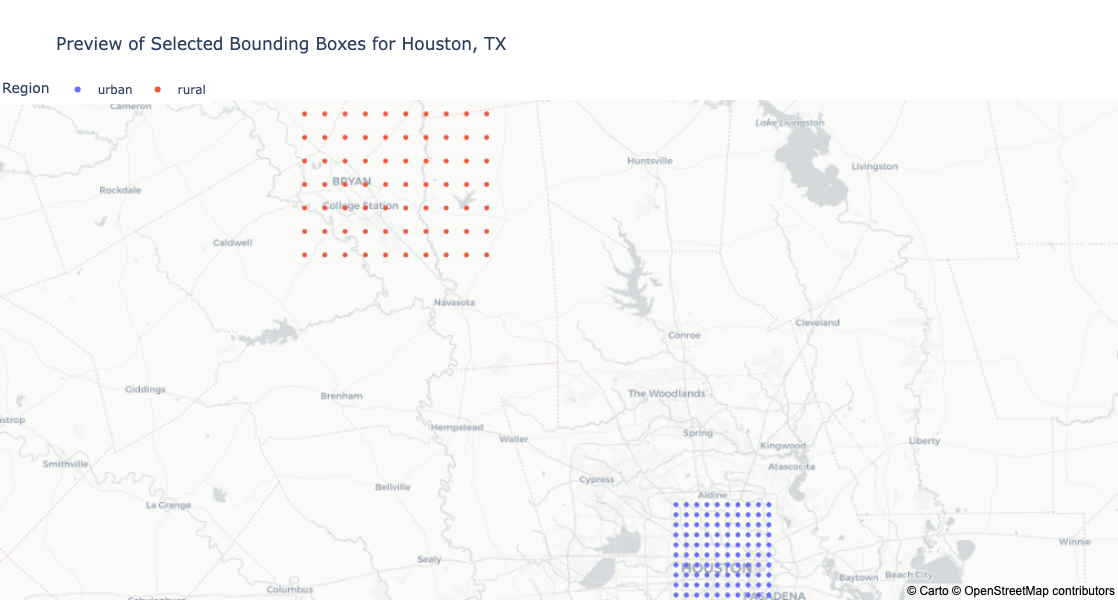

In [6]:
## Plot the region suggested
fig = px.scatter_mapbox(coords_df, lat="Latitude", lon="Longitude", color='Region',
                        # color_continuous_scale="Viridis", 
                        mapbox_style="carto-positron",
                        title=f"Preview of Selected Bounding Boxes for {data_params['city_region_name']}",
                        height=600, width=600)

# Remove left and right side margins
fig.update_layout(
    margin={"r":0, "l":0,'b':0, 't':100},
    legend={'orientation':"h", 'yanchor':"top", 'y':1.05, 'xanchor':"left", 'x':0},
    
)

fig.show()
## Save fig for README
fig.write_image(f"{img_dir}selected_regions.png")

In [7]:
def preview_regions(data_params):
    

    # Dataframe to store results
    sampled_coordinates = []

    # Check if any coordinates within the bounding boxes are over sea
    for region, bounding_box in data_params['coordinates'].items():
        # Generate sample points within the bounding box
        sample_points = generate_sample_points(bounding_box['SW'], bounding_box['NE'], num_points=10)
        for lat, lon in sample_points:
            sampled_coordinates.append({'Region': region, 'Latitude': lat, 'Longitude': lon})

    # Convert results to DataFrame
    coords_df = pd.DataFrame(sampled_coordinates)
    
    
        ## Plot the region suggested
    fig = px.scatter_mapbox(coords_df, lat="Latitude", lon="Longitude", color='Region',
                            # color_continuous_scale="Viridis", 
                            mapbox_style="carto-positron",
                            title=f"Preview of Selected Bounding Boxes for {data_params['city_region_name']}",
                            height=600, width=600)

    # Remove left and right side margins
    fig.update_layout(
        margin={"r":0, "l":0,'b':0, 't':100},
        legend={'orientation':"h", 'yanchor':"top", 'y':1.05, 'xanchor':"left", 'x':0},
        
    )

    return fig
    ## Save fig for README
    # fig.write_image(f"{img_dir}selected_regions.png")

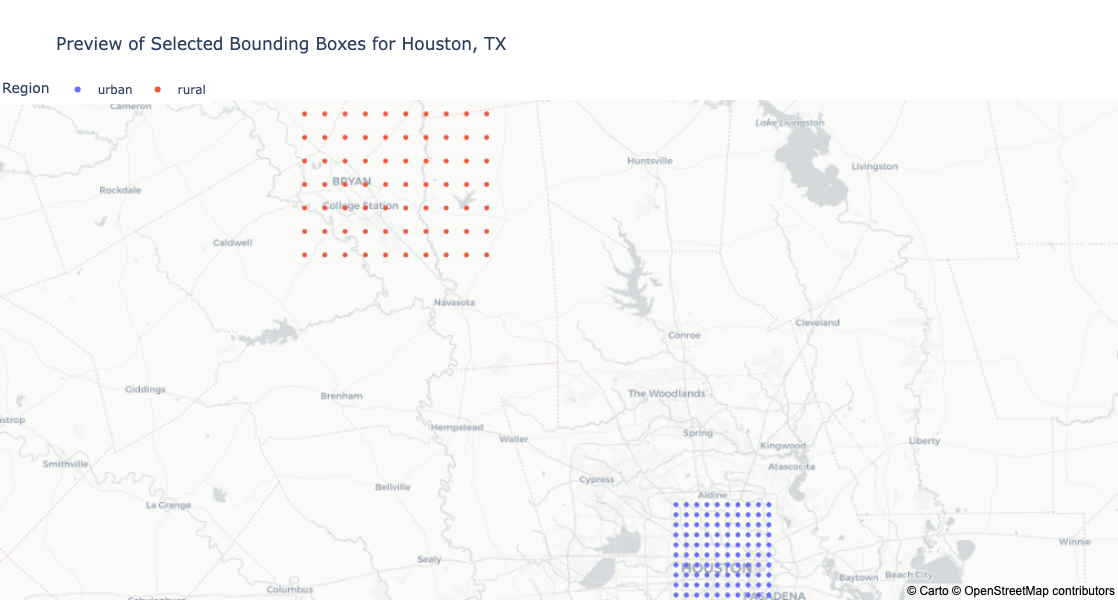

In [8]:
preview_regions(data_params)

If we are happy with the coordinates, we will proceed with using the Earth Data API `TO DO GET RIGHT NAME` to download the corresponding MODIS data.

`ADD SEGWAY NOW THAT DOWNLOAD CODE NOT INCLUDED`
The processing code for working with the downloaded files is beyond the scope of this blog post. However, suffice it to say that there may be data quality issues or other challenges that need to be addressed. 

For example, the downloaded files may contain a large amount of missing or corrupted data. These issues can be addressed using a combination of data preprocessing techniques, data cleaning methods, and data transformation tools. However, if we can adjust our starting parameters dynamically, we can find parameters with fewer issues, allowing a cleaner analysis.

To do so, we will leverage the OpenAI API with LangChain to query ChatGPT for new suggested parameters from within our notebook.

## Getting New Suggested Parameters from OpenAI 

### Setting Up OpenAI + LangChain

1. **Sign up for OpenAI's API:** 
   - Visit the [OpenAI website](https://www.openai.com) and sign up for an API key.

2. **Create a `.secret` folder:**
   ```bash
   cd ~
   mkdir .secret
   ```

3. **Save your API key as a text file in the `.secret` folder:**
   - Open a text editor and paste your API key.
   - Save the file as `open-ai.txt` in the `.secret` folder. For example, you can use the following command in the terminal to create the file and save the API key:
   ```bash
   echo "your_openai_api_key_here" > ~/.secret/open-ai.txt
   ```

4. **Export the key from the file to your `.bash_profile` or `.zshrc`:**
   - Open your `.bash_profile` for editing:
   ```bash
   code ~/.bash_profile
   ```
   If using zsh, use: 
   ```bash
   code ~/.zshrc
   ```
   - Add the following line to export the API key:
   ```bash
   export OPENAI_API_KEY=$(cat ~/.secret/open-ai.txt)
   ```
   - Save the file and exit the editor 

5. **Reload your `.bash_profile` to apply the changes:**
   ```bash
   source ~/.bash_profile
   ```
   If you're using zsh:
   ```bash
   source ~/.zshrc
   ```

After following these steps, your API key will be available in your environment variables as `OPENAI_API_KEY`.

You can confirm this with Python by importing the `os` module and checking the `os.environ` dictionary for 'OPENAI_API_KEY'.


In [9]:
import os
'OPENAI_API_KEY' in os.environ

True


> Note: Do NOT display the value of your OPENAI_API_KEY. If you accidentally expose your API credentials, OpenAI will automatically deactivate them, causing any program or app that uses it to break. 

### Using LangChain with ChatGPT

LangChain is a versatile framework designed to simplify the integration of language models into various applications, enabling seamless management of inputs and outputs, including structured data formats. By leveraging LangChain, developers can efficiently implement advanced AI functionalities, such as function calling, tool calling, and JSON mode, ensuring consistent and reliable outputs tailored to specific needs. This framework facilitates the creation of sophisticated AI-driven solutions across different domains, making it an essential tool for modern AI development. 

In [10]:
# !pip install -U langchain_openai langchain_core langchain_community pydantic

In [11]:
os.makedirs("blog", exist_ok=True)

In [1]:
# !pip freeze

In [13]:
# !pip freeze >> blog/requirements.txt

In [2]:
# with open("blog/requirements.txt", "r") as f:
#     print(f.read()) 

To consruct a chain using LangChain's newer LCEL (LangChain Execution Language) we need to define the following:
- The prompt
- The llm model
- The output format

#### LangChain's `PromptTemplate`

Prompt engineering/construction is vital for obtaining high-quality results from any Large Langauge Model (LLM). To get the best suggestions from the API, it is important to provide sufficient context in our prompt/query, while leaving the option to customize the prompt on-the-fly.

To do so, we will create a prompt_string that has our prompt plus a set of curly brackets around a `specs` variable, as-if it was an f-string ( but note that we are not actually using it as an f-string).

In [15]:

prompt_string = """I am performing an urban heat island analysis project with MODIS data comparing urban areas vs. rural areas. 
I need to download MODIS data for 2 nearby non-overlapping regions (urban area and rural area outside of city) and time range.
Help me select the urban and rural regions and time, keeping the following in mind:
{specs}
"""
print(prompt_string)

I am performing an urban heat island analysis project with MODIS data comparing urban areas vs. rural areas. 
I need to download MODIS data for 2 nearby non-overlapping regions (urban area and rural area outside of city) and time range.
Help me select the urban and rural regions and time, keeping the following in mind:
{specs}



We will use this prompt_string to construct a PromptTemplate object with LangChain, which will turn our f-string variable into a parameter that we pass in with our request. 

In [16]:
from langchain_core.prompts import PromptTemplate

# Converting the prompt_string to a PromptTemplate
prompt = PromptTemplate.from_template(prompt_string) 
prompt

PromptTemplate(input_variables=['specs'], template='I am performing an urban heat island analysis project with MODIS data comparing urban areas vs. rural areas. \nI need to download MODIS data for 2 nearby non-overlapping regions (urban area and rural area outside of city) and time range.\nHelp me select the urban and rural regions and time, keeping the following in mind:\n{specs}\n')

In [17]:
# Any f-string variables in the prompt string become input_variables.
prompt.input_variables

['specs']

In [18]:
# The prompt string with the f-string variables replaced by the input values using the .format() method
specs_string= "1. Urban area should be within the city limits and rural area should be outside the city limits."
print(prompt.format(specs=specs_string))

I am performing an urban heat island analysis project with MODIS data comparing urban areas vs. rural areas. 
I need to download MODIS data for 2 nearby non-overlapping regions (urban area and rural area outside of city) and time range.
Help me select the urban and rural regions and time, keeping the following in mind:
1. Urban area should be within the city limits and rural area should be outside the city limits.



#### Instantiating an LLM

Next, we need to instantiate a language model. LangChain has separate packages for each of the LLMs it is compatible with. Since we are using OpenAI, we will use the ChatOpenAI object from `langchain_openai`.

In [19]:
from langchain_openai import ChatOpenAI 
chat = ChatOpenAI(api_key=os.environ['OPENAI_API_KEY'], model="gpt-4o", temperature=0.0)
chat

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x16471d3d0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x16472d650>, model_name='gpt-4o', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='')

#### Adding an Output Parser

The final piece of our chain is the output parser. While we could technically leave this out of our chain, it is better that we use the default StrOutputParser to convert our response into a simple string (instead of a JSON-like dictionary).

In [20]:
from langchain_core.output_parsers import StrOutputParser
output_parser = StrOutputParser()

### Putting it All Together: Our First Chain

Now that we have the 3 components of our chain, we construct the final chain using LCEL. 

Our chain starts with the prompt, followed by a pipe symbol `|` and then the LLM object, followed by another pipe, and finally the output parser. 

In [21]:
# Constructing Our Chain
chain = prompt | chat | output_parser
chain


PromptTemplate(input_variables=['specs'], template='I am performing an urban heat island analysis project with MODIS data comparing urban areas vs. rural areas. \nI need to download MODIS data for 2 nearby non-overlapping regions (urban area and rural area outside of city) and time range.\nHelp me select the urban and rural regions and time, keeping the following in mind:\n{specs}\n')
| ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x16471d3d0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x16472d650>, model_name='gpt-4o', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='')
| StrOutputParser()

To use the chain we use the .invoke method and must provide the `input_variables` that are required by the prompt template.

In [22]:
# Attempting to use .invoke without input variables
try:
    response = chain.invoke()
    print(response)
except Exception as e:
    display(e)


TypeError("RunnableSequence.invoke() missing 1 required positional argument: 'input'")

In [23]:
# Using the input variables to provide the necessary information
specs_string = """1. Urban area should be within the city limits and rural area should be outside the city limits.
2. The urban area should be selected within the southern US region to study the urban heat island effect. 
"""
response = chain.invoke({'specs':specs_string})
print(response)

To perform an urban heat island analysis using MODIS data, you need to carefully select your urban and rural regions to ensure they are representative and non-overlapping. Here’s a step-by-step guide to help you select the regions and time range:

### Step 1: Select the City
Choose a city in the southern US that is known for its urban heat island effect. For this example, let's select **Houston, Texas**. Houston is a large metropolitan area with significant urban development, making it a good candidate for this study.

### Step 2: Define the Urban Area
Identify the urban area within Houston city limits. You can use city boundary data from sources like the US Census Bureau or GIS databases. For simplicity, let's define the urban area as the central part of Houston.

### Step 3: Define the Rural Area
Select a rural area outside the city limits of Houston. Ensure this area is sufficiently far from the urban area to avoid overlap and influence from urban heat. A good choice would be a rura

In [24]:
# ChatGPT responds with Markdown-stytled text, so we can use IPython's `Markdown` class to render it
from IPython.display import Markdown, display
display(Markdown(response))

To perform an urban heat island analysis using MODIS data, you need to carefully select your urban and rural regions to ensure they are representative and non-overlapping. Here’s a step-by-step guide to help you select the regions and time range:

### Step 1: Select the City
Choose a city in the southern US that is known for its urban heat island effect. For this example, let's select **Houston, Texas**. Houston is a large metropolitan area with significant urban development, making it a good candidate for this study.

### Step 2: Define the Urban Area
Identify the urban area within Houston city limits. You can use city boundary data from sources like the US Census Bureau or GIS databases. For simplicity, let's define the urban area as the central part of Houston.

### Step 3: Define the Rural Area
Select a rural area outside the city limits of Houston. Ensure this area is sufficiently far from the urban area to avoid overlap and influence from urban heat. A good choice would be a rural region to the northwest of Houston, such as around **Hempstead, Texas**.

### Step 4: Select the Time Range
Choose a time range that covers different seasons to capture variations in the urban heat island effect. A good time range would be one year, for example, from **January 1, 2022, to December 31, 2022**.

### Step 5: Download MODIS Data
Use NASA's Earthdata Search or other platforms like Google Earth Engine to download the MODIS data for the selected regions and time range. You will need to download data for both the urban and rural areas separately.

### Example Coordinates
- **Urban Area (Houston, TX):**
  - Latitude: 29.7604° N
  - Longitude: 95.3698° W
  - Approximate bounding box: 
    - North: 29.8700° N
    - South: 29.6500° N
    - East: 95.2000° W
    - West: 95.5000° W

- **Rural Area (Hempstead, TX):**
  - Latitude: 30.0977° N
  - Longitude: 96.0780° W
  - Approximate bounding box:
    - North: 30.2000° N
    - South: 30.0000° N
    - East: 96.0000° W
    - West: 96.2000° W

### Steps to Download MODIS Data
1. **Visit NASA Earthdata Search:**
   - Go to [Earthdata Search](https://search.earthdata.nasa.gov/).
   - Sign in or create an account if you don't have one.

2. **Search for MODIS Data:**
   - Enter "MODIS" in the search bar.
   - Select the appropriate MODIS product (e.g., MOD11A2 for Land Surface Temperature).

3. **Set Spatial and Temporal Filters:**
   - Use the map to draw bounding boxes for the urban and rural areas.
   - Set the time range from January 1, 2022, to December 31, 2022.

4. **Download Data:**
   - Add the selected data to your project.
   - Download the data files for both regions.

### Analysis
Once you have downloaded the data, you can use GIS software or programming languages like Python (with libraries such as GDAL, NumPy, and Matplotlib) to analyze the temperature differences between the urban and rural areas over the selected time range.

By following these steps, you should be able to effectively compare the urban heat island effect between Houston and its surrounding rural area using MODIS data.

To leverage the new suggestions from ChatGPT, we would have to manually construct a new `data_params` dict using the raw text from the response. This is a manual process that can be automated by using a more complex Output Parser: the Json.

### Getting Structured Output from LangChain

We want to produce a JSON-dictionary with the same structure as our original `data_params`. 


In [25]:
# Starting Parameters (manual)
data_params = {'city_region_name':'Houston, TX',
               'coordinates': {
                   'urban': {
                       'SW': [29.69193, -95.47998],
                        'NE': [29.90719, -95.2251]
                        },
                   'rural': {
                       'SW': [30.5, -96.5],
                       'NE': [31.0, -96.0]
                       }
                   },
               'time': {
                   'start': '2023-06-01T00:00:00Z',
                   'end': '2023-08-31T23:59:59Z'
                   }
               }
data_params

{'city_region_name': 'Houston, TX',
 'coordinates': {'urban': {'SW': [29.69193, -95.47998],
   'NE': [29.90719, -95.2251]},
  'rural': {'SW': [30.5, -96.5], 'NE': [31.0, -96.0]}},
 'time': {'start': '2023-06-01T00:00:00Z', 'end': '2023-08-31T23:59:59Z'}}


To review, the `data_params` will have the following 3 keys:
- `city_region_name`: the name of the metro area associated with the selected urban and rural coordinates.
- `coordinates`: a nested dictionary with keys for the `urban` region and `rural` region.
    - `urban` and `rural` keys both contain a `SW` and `NE` coordinate.
        - the `SW` and `NE` coordinates are provided as a list of [latitude, longitude]
- `time`: a nested dictionary with a `start` and `end` time.

### Structured Output

- We can construct a Pydantic data model to control structured output of API parameters from ChatGPT.

The pydantic data model will be a class that contains defined the exact structure of the desired output, including data types.

The default example from the langchain documentation is as follows:

In [26]:
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.output_parsers import JsonOutputParser

# Create the prompt    
prompt_template_string = """Tell me a joke about {topic}
Format Instructions:
{format_instructions}
"""
prompt = PromptTemplate.from_template(prompt_template_string)

# Create the LLM
chat = ChatOpenAI(api_key=os.environ['OPENAI_API_KEY'], model="gpt-4o", temperature=0.0)


# Specify the structured output for the LLM
class Joke(BaseModel):
    setup: str = Field(description="The setup of the joke")
    punchline: str = Field(description="The punchline to the joke")
    
# Create the output parser with the structured output
output_parser = JsonOutputParser(pydantic_object=Joke)

# Add the format instructions from the Output Parser using the .partial PromptTemplate method
prompt = prompt.partial(format_instructions=output_parser.get_format_instructions())

# Construct the chain
chain = prompt | chat | output_parser
chain

PromptTemplate(input_variables=['topic'], partial_variables={'format_instructions': 'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"setup": {"title": "Setup", "description": "The setup of the joke", "type": "string"}, "punchline": {"title": "Punchline", "description": "The punchline to the joke", "type": "string"}}, "required": ["setup", "punchline"]}\n```'}, template='Tell me a joke about {topic}\nFormat Instructions:\n{format_instructions}\n')
| ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x163a25250>, async_client=<openai.resources.

In [27]:
response = chain.invoke({'topic':'chickens'})
response.keys()

dict_keys(['setup', 'punchline'])

In [28]:
print(response['setup'])
print(response['punchline'])

Why did the chicken join a band?
Because it had the drumsticks!


### Nested-Structured Output

- Since we have several requirements for the format of our data_params dictionary, we will need to create classes to represent each type of formatting needed, with a final class that contains all of them.

In [29]:
from pydantic import BaseModel, Field, create_model
from typing import List, Optional, Text, Dict

In [30]:
## Defining the structured output desired from chat gpt
## Tip was to use make_model
# https://stackoverflow.com/questions/63257839/best-way-to-specify-nested-dict-with-pydantic
class Coordinates(BaseModel):
    SW: List[float]
    NE: List[float]
    
class RegionCoordinates(BaseModel):
    rural: Optional[Coordinates]
    urban: Optional[Coordinates]
                            
class DataParams(BaseModel):
    """
    Represents the parameters for data analysis.

    Attributes:
        city_region_name (str): The name of the city or region.
        coordinates (Optional[RegionCoordinates]): The coordinates of the city or region.
        time (Dict[str, str]): A dictionary containing time-related information.
    """
    city_region_name: str
    coordinates: Optional[RegionCoordinates]
    time: Dict[str, str]

### Created a function that asks ChatGPT for suggested parameters

In [31]:
def suggest_data_params(specs: str, temperature=0.0, model_type='gpt-4o', return_json=True) -> str:
    """
    Suggests data parameters for downloading MODIS data for a specific region and time range.
    
    Args:
        query (str): The query describing the requirements for the data download.
        temperature (float, optional): The temperature parameter for the language model. Defaults to 0.1.
        model_type (str, optional): The type of language model to use. Defaults to 'gpt-4o'.
        return_llm (bool, optional): Whether to return the language model chain. Defaults to False.
        return_json (bool, optional): Whether to return the response as JSON. Defaults to True.
    
    Returns:
        str: The response from the language model chain or the JSON response, depending on the value of return_json.
    """
    
    # The prompt template for suggesting data parameters
    prompt = """
    I am performing an urban heat island analysis project with MODIS data comparing urban areas vs. rural areas. 
    I need to download MODIS data for 2 nearby non-overlapping regions (urban area and rural area outside of city) and time range.
    Help me select the urban and rural regions and time following the instructions below.
    {specs}
    
    Provide me the data parameters for the download (city_region_name, coordinates as SW [lat,long] NE [lat,long], time_start named 'start', time_end named 'end') in the following format:
    Format Instructions:
    Use the 2-letter abbreviations for the state.
    {format_instructions}
    """
    # Create a ChatPromptTemplate object
    final_prompt_template = PromptTemplate.from_template(prompt)

    # Get api key for OpenAI from the environment or session state (if on Streamlit)
    api_key = os.getenv('OPENAI_API_KEY')
        
    # Instantiate the language model and setting the specific model (chat-gpto is newest and reasonable price)
    # and  set the temperature (creativity level)
    llm = ChatOpenAI(temperature=temperature, model=model_type, api_key=api_key)
    
    if return_json:
        # # JsonOutputParser will use the data model classes from above
        parser = JsonOutputParser(pydantic_object=DataParams,)    
        # Add formatting instructions for pydantic
        instructions =  parser.get_format_instructions()
            
    else:
        ## StrOutputParser will return the response as a string
        parser = StrOutputParser(output_key="response")
        # Manually defining the format instructions
        instructions = "Respond with text for each topic as a nested list with the topic number,  descriptive label,top words, and short insight."
        
        
    ## Adding the instructions to the prompt template
    final_prompt_template = final_prompt_template.partial(format_instructions=instructions)
    
    
    # Making the final chain
    llm_chain = final_prompt_template | llm | parser
    
    # Invoke the chain with the query to get the response
    return llm_chain.invoke(input=dict(specs=specs))

In [32]:

specs = """Select a region that will be a perfect example of the effects of urban heat islands.
Select small identically-sized nearby non-overlapping regions from the selected area to minimize the size of the dataset.
Do not use Texas."""

# ask ChatGPT to suggest another set of parameters
chatgpt_params = suggest_data_params(specs=specs, 
                                    return_json=True, temperature=0.0)
chatgpt_params

{'city_region_name': 'Phoenix, AZ',
 'coordinates': {'urban': {'SW': [33.4, -112.2], 'NE': [33.5, -112.1]},
  'rural': {'SW': [33.6, -112.3], 'NE': [33.7, -112.2]}},
 'time': {'start': '2022-06-01', 'end': '2022-08-31'}}

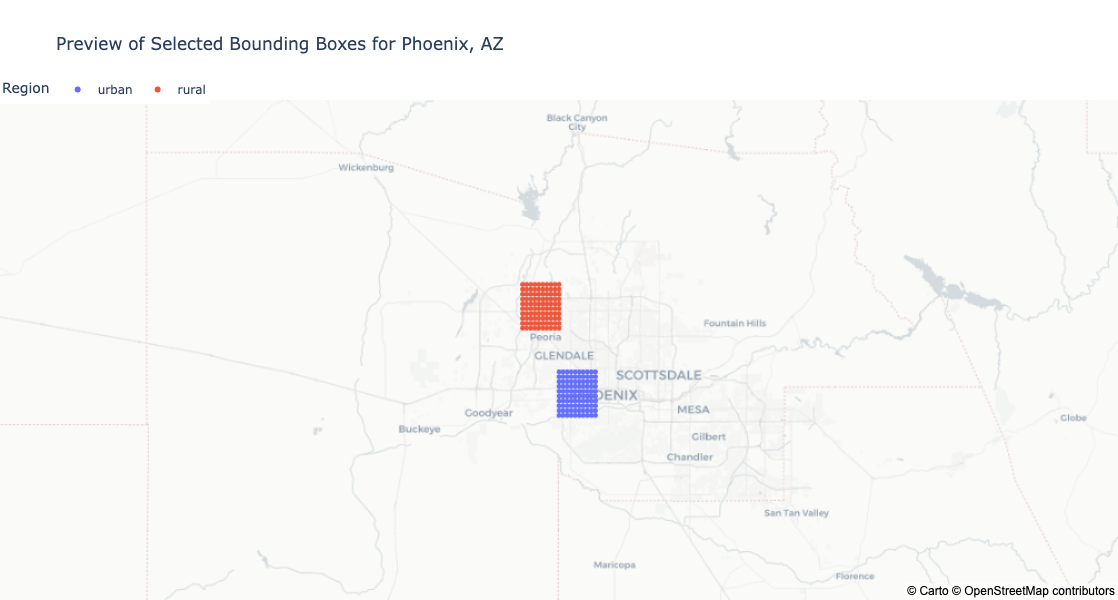

In [33]:
preview_regions(chatgpt_params)

{'city_region_name': 'Atlanta, GA',
 'coordinates': {'rural': {'NE': [33.6, -84.4], 'SW': [33.5, -84.5]},
                 'urban': {'NE': [33.8, -84.3], 'SW': [33.7, -84.4]}},
 'time': {'end': '2022-08-31', 'start': '2022-06-01'}}


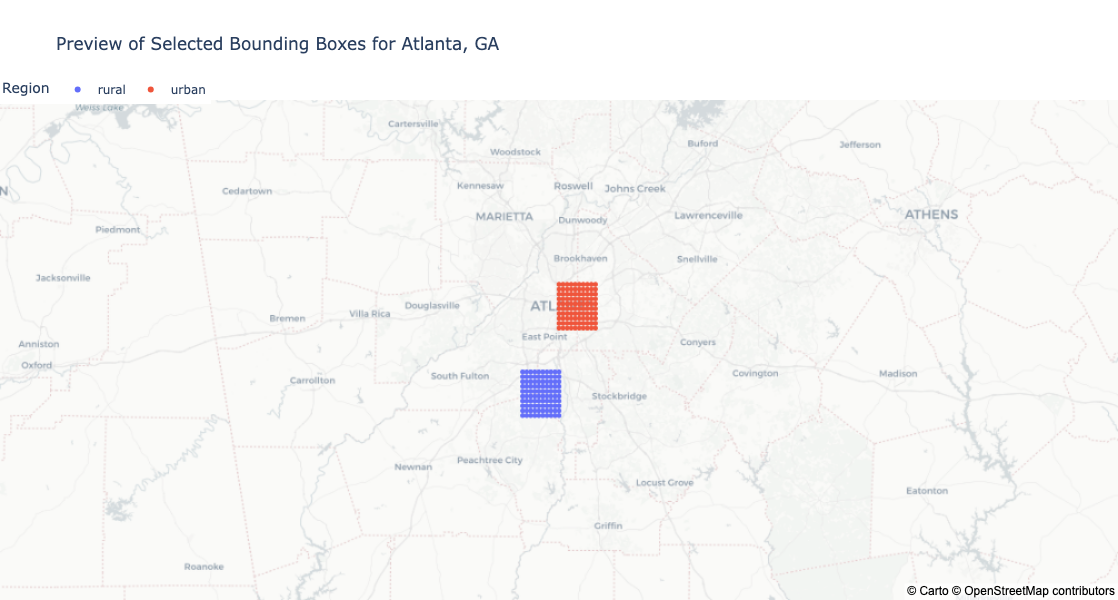

In [34]:

specs = """Select a region that will be a perfect example of the effects of urban heat islands.
Select small identically-sized nearby non-overlapping regions from the selected area to minimize the size of the dataset.
Select a region in a non-desert area."""

# ask ChatGPT to suggest another set of parameters
chatgpt_params = suggest_data_params(specs=specs, 
                                    return_json=True, temperature=0.0)
pprint(chatgpt_params)
preview_regions(chatgpt_params)

And then we can use these new data_params to download the NASA Earth Science data, which will be covered in a later blog post. 


# APPENDIX

In [35]:
raise Exception("Stop here") 

Exception: Stop here

# DECISION: Download Data next or LangChain Next?

## Download Data from NASA's Earth Data API  (`To Do: granules endpoint?`)

Now that we have the parameters for the locations, we need to ask the NASA Earthdata API for the data  

#### Sign up For NASA's Earth Data Api

To use the NASA Earthdata API with a token, you need to generate a token from the NASA Earthdata Login (EDL) and use it in your API requests.



#### Step-by-Step Guide

1. **Generate a Token from NASA Earthdata Login:**
   - Log in to your [NASA Earthdata Login](https://urs.earthdata.nasa.gov).
   - Navigate to the "My Profile" section.
   - Generate a new token under the "User Profile" section.
   - Save the crednetials in a .json file on your local machine. 
    > - Note: if you store this file within a repository, make sure to add the credentials file to your `.gitignore`!

In [ ]:
import json
# where we stored the token locally on our PC
creds_json = "./earthdata_creds.json"
with open(creds_json) as f:
    creds = json.load(f)
print(creds.keys())

# Your NASA Earthdata token
token = creds['token']


2. **Use the Token in Your API Requests:**
   - Use the generated token in the `Authorization: Bearer` header of your API requests.

In [ ]:
def search_and_download(region_name, bounding_box, time_range, token, dest_folder='./data/MODIS-LST/',
                        force_download=False, verbose=True):
    """
    Searches for granules using the NASA Earthdata API and downloads the data files for a given region.

    Args:
        region_name (str): The name of the region.
        bounding_box (dict): The bounding box coordinates of the region in the format {'SW': [lat, lon], 'NE': [lat, lon]}.
        time_range (dict): The temporal range of the data in the format {'start': 'YYYY-MM-DD', 'end': 'YYYY-MM-DD'}.
        token (str): The access token for the NASA Earthdata API.
        dest_folder (str, optional): The destination folder to save the downloaded data files. Defaults to './data/MODIS-LST/'.

    Returns:
        list: A list of dictionaries containing the region name and the URL of each downloaded data file.
    """
    # Authorization header with the token
    headers = {
            'Authorization': f'Bearer {token}'
        }

    # Base URL for searching granules
    search_url = 'https://cmr.earthdata.nasa.gov/search/granules.json'
    
    # Pagination settings
    page_size = 10
    page_num = 1
    total_hits = None

    # List to store entries and links
    entries_links = []

    while True:
        # Set up the parameters for the search query
        params = {
            'short_name': 'MOD11A2',  # Dataset short name
            'version': '061',         # Dataset version
            'temporal': f"{time_range['start']},{time_range['end']}",  # Temporal range
            'bounding_box': f"{bounding_box['SW'][1]},{bounding_box['SW'][0]},{bounding_box['NE'][1]},{bounding_box['NE'][0]}",  # Bounding box coordinates
            'page_size': page_size,   # Number of results per page
            'page_num': page_num      # Current page number
        }
        
        # Send the request to the NASA Earthdata API
        response = requests.get(search_url, params=params, headers=headers)

        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()
            
            # Determine the total number of hits on the first request
            if total_hits is None:
                total_hits = int(response.headers.get('CMR-Hits', 0))
                print(f"Total hits for {region_name}: {total_hits}")

            # Check if there are entries in the response
            if data['feed']['entry']:
                for entry in data['feed']['entry']:
                    # Extract relevant metadata from each entry
                    granule_id = entry.get('id', 'N/A')
                    dataset_id = entry.get('dataset_id', 'N/A')
                    start_time = entry.get('time_start', 'N/A')
                    end_time = entry.get('time_end', 'N/A')
                    spatial_extent = entry.get('boxes', ['N/A'])[0]
                    
                    
                    # Extract the data links for downloading
                    data_links = [link['href'] for link in entry['links'] if 'data#' in link['rel']]
                    
                    # Download each data link and store the entries and links
                    for url in data_links:
                        dir_for_dl = os.path.join(dest_folder, region_name)
                        # Define the filename based on the URL (to check if the file is a directory)
                        filename = os.path.join(dir_for_dl,#dest_folder, 
                                                url.split('/')[-1])
                        
                        # Check if directory
                        if os.path.isdir(filename):
                            if verbose:
                                print(f"- Skipping directory {filename}")
                            continue
                        
                        if "s3credentials" in filename:
                            if verbose:
                                print(f"- Skipping S3 credentials link {filename}")
                            continue
                        
                        if '?p' in filename:
                            if verbose:
                                print(f"- Skipping link with query parameters {filename}")
                            continue
                        # Remove question marks
                        filename = filename.replace("?", "-")
                        
                        # Use the helper function to download the file
                        filepath = download_file(url, dir_for_dl, token, force_download=force_download, 
                                                 verbose=verbose # Always be verbose for download
                                                 )
                        # Add the entry to the list
                        entries_links.append({'region': region_name, 'url': url,"fpath":filepath, 'granule_id': granule_id, 'dataset_id': dataset_id,
                                            'start_time': start_time, 'end_time': end_time, 'spatial_extent': spatial_extent})
            else:
                print(f"\n[!] No entries found for region: {region_name}")

            # Check if we have fetched all results
            if page_num * page_size >= total_hits:
                break
            else:
                page_num += 1
        else:
            print(f"\n[!] Error: {response.status_code} - {response.text}")
            break

    return entries_links

In [ ]:
def download_file(url, dest_folder, token, force_download=False, verbose=True):
    """
    Downloads a file from the given URL and saves it to the specified destination folder.

    Args:
        url (str): The URL of the file to download.
        dest_folder (str): The destination folder where the file will be saved.
        token (str): The authorization token for accessing the file.
        force_download (bool, optional): If set to True, the file will be downloaded even if it already exists in the destination folder. Defaults to False.

    Returns:
        str: The path of the downloaded file.

    Raises:
        None

    """
    # Create the destination folder if it doesn't exist
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    
    # Define the filename based on the URL
    filename = os.path.join(dest_folder, url.split('/')[-1])
    
    # Check if the file already exists
    if os.path.exists(filename) and not force_download:
        if verbose:
            print(f"- File {filename} already exists, skipping download.")
        return filename

    # Authorization header with the token
    headers = {
        'Authorization': f'Bearer {token}'
    }
    
    try:
        # Send the request to download the file
        response = requests.get(url, headers=headers)
        
    except Exception as e:
        print(f"- [!] An error occurred while downloading {url}: {e}")
        return
    
    # Save the file if the request is successful
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        # if verbose:
        print(f"- Downloaded {filename}")
    else:
        print(f"- [!] Failed to download {url}: {response.status_code}")
    
    return filename

In [ ]:
# Set DATA_DIR using region name from data params
region_name = data_params['city_region_name'].replace(',','_').replace(' ','')
DATA_DIR = f"./data/MODIS-LST/{region_name}/"
DATA_DIR

In [ ]:
# List to store all entries and links
all_entries_links = []

# Iterate through the regions and download data
for region_name, bounding_box in data_params['coordinates'].items():
    # group_links=  []
    entries_links = search_and_download(region_name, bounding_box, 
                                        data_params['time'], 
                                        token=creds['token'],
                                        dest_folder=DATA_DIR, 
                                        force_download=False, 
                                        verbose=False # new verbose flag
                                        )
    all_entries_links.extend(entries_links)
    print('\n\n')

### Unused Sentence

Instead of using f-strings to construct the final prompt for the language model, we can use `langchain` library to create an LLM chain that automatically formats the prompt with the query provided by the user. We do so by converting our string prompt to a PromptTemplate object using the .from_template method. 


### [`STILL NEEDED?`]Reproducible and Customizable Queries/Prompts 

We got a lot of great information from our prompt:
- We have new coordinates includes in our result,
- We have new time period

but there are 2 issues to resolve:
- Continuing to tweak and iterate on our prompt to get updated results 
- we received a large amount of unnecessary text, if all we want is the new values for our data_params dictionary. 


Therefore, we will construct a detailed system prompt that includes a `query` parameter, which is where we will add additional details to our requests. 
